In [1]:
from IPython.display import Image

# Tensor Flow

**Big idea**: Express a numeric computation as a graph.  
- Graph nodes are **operations** which have any number of inputs and outputs
- Graph edges are **tensors** which flow between nodes

### Basic flow:

- **Build a graph**
    - Graph contains parameter specifications, model architecture, optimization process, … 
        
        
- **Initialize a session**
        
        
- **Fetch and feed data with Session.run**
    - Compilation, optimization, etc. happens at this step


----

#### 1. Hello World

In [2]:
import tensorflow as tf

In [3]:
hello = tf.constant('Hellow, TensorFlow!')

In [4]:
# Launch the default graph.
sess = tf.Session()
sess.run(hello)
# Close the Session when we're done.
sess.close()

----

#### 2. Basic Operations I

*with constants*

In [5]:
a = tf.constant(2)
b = tf.constant(3)

In [6]:
with tf.Session() as sess:
    print "a=2, b=3"
    print "Addition with constants: %i" % sess.run(a+b)
    print "Multiplication with constants: %i" % sess.run(a*b)

a=2, b=3
Addition with constants: 5
Multiplication with constants: 6


*with variables*

In [7]:
a = tf.placeholder(tf.types.int16)
b = tf.placeholder(tf.types.int16)

In [8]:
add = tf.add(a, b)
mul = tf.mul(a, b)

In [9]:
with tf.Session() as sess:
    print "Addition with variables: %i" % sess.run(add, feed_dict={a:2, b:3})
    print "Multiplication with variables: %i" % sess.run(mul, feed_dict={a:2, b:3})    

Addition with variables: 5
Multiplication with variables: 6


---

#### 3. Basic Operations II: NN feedforward

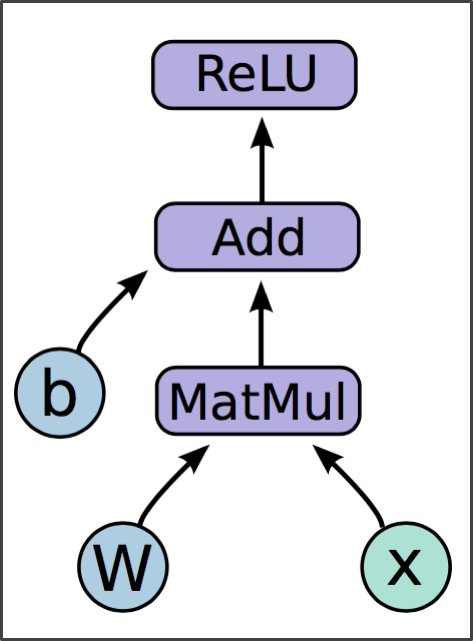

In [10]:
Image(filename='../img/p1.png', width=200) 

$$h_i = ReLU(Wx+b)$$

**_W_, _b_:**  
- **Variables** are 0-ary stateful nodes which output their current value
- State is retained across multiple executions of a graph.
- _(parameters, gradient stores, eligibility traces, …)_


**_x_:**  
- **Placeholders** are 0-ary nodes whose value is fed in at execution time.
- _(inputs, variable learning rates, …)_


**Mathematical operations:**  
- **MatMul**: Multiply two matrix values.
- **Add**: Add elementwise (with broadcasting).
- **ReLU**: Activate with elementwise rectified linear function.


`
b = tf.Variable(tf.zeros(100,))
W = tf.Variable(tf.random_normal((784, 100), -1, 1))
x = tf.placeholder(tf.float32, (None, 784))
h_i = tf.nn.relu(tf.matmul(x, W) + b)
`

So far we have defined a **graph**.  
We can deploy this graph with a **session**: a binding to a particular execution context (e.g. CPU, GPU)  
  
**`"sess.run(fetches, feeds)"`**  
- **Fetches**: List of graph nodes. Return the outputs of these nodes.
- **Feeds**: Dictionary mapping from graph nodes to concrete values. Specifies the value of each graph node given in the dictionary.


`
sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(h_i, {x: np.random.random(64, 784)})
`

----

## Summary:
### Basic flow:

- **Build a graph**
    - Graph contains parameter specifications, model architecture, optimization process, … 
        
        
- **Initialize a session**
        
        
- **Fetch and feed data with Session.run**
    - Compilation, optimization, etc. happens at this step — you probably won’t notice


----